# IED distributions during flicker sessions

### Sina Dabiri


In [46]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import os
import scipy.stats as stats
from scipy.io import loadmat

## 1. select which subject's data to use
Check excel sheet to see which subjects to include in IED histogram analysis
FlickerStudyMetadata.xlsx

In [47]:
path="Y:\FlickerStudyMetadata.xlsx"
FlickerStudy_df = pd.read_excel(path)

In [48]:
FlickerStudy_df.head()

,Subject_ID,Experiment,Session,Session_version,Completed?,Number of sessions within experiment,Include in analysis?,Brightness lux 1 (40Hz AV)- left,Brightness lux 2 (40Hz AV)- right,Average brightness,...,Number of single units,Location of single units,"AEDs taken on day of testing, before testing",Relevant notes,Date,Start time\n(of experiment),End time\n(of experiment),"Seizure (clinical or subclinical, as stated on EMR) during session?",Seizure deemed related to experiment?,Documented neurologist's assessment that seizure unrelated to experiment?
0,FL000,flickerneuro,1,NaN,1,6,1,162,163,162.5,...,NaN,NaN,Lamotrigine (300mg); Levetiracetam (750mg); Zo...,Occluded condition was 40Hz-AV; any other notes?,2020-01-21,12:24:44,13:39:08,NaN,NaN,NaN
1,FL001,flickerneuro,1,NaN,1,6,1,200,197,198.5,...,11,"mid-hippocampus, posterior-cingulate",Lamotrigine (300mg); Levetiracetam (2000mg); T...,NaN,2020-02-08,16:50:01,17:59:51,NaN,NaN,NaN
2,FL002,flickerneuro,1,NaN,1,6,1,13,14,13.5,...,NaN,NaN,Lamotrigine (200mg).,NaN,2020-08-11,17:03:47,18:25:24,NaN,NaN,NaN
3,FL003,flickerneuro,1,NaN,1,6,1,48,50,49.0,...,NaN,NaN,Lamotrigine (75mg); Levetiracetam (250mg).,NaN,2020-11-22,15:06:43,18:26:12,NaN,NaN,NaN
4,FL003,spep,1,NaN,1,NaN,1,709,720,714.5,...,NaN,NaN,None.,NaN,2020-11-23,11:55:39,12:29:54,NaN,NaN,NaN


In [49]:
# Filtering for subjects to include in analysis 
sessions = FlickerStudy_df.loc[FlickerStudy_df['Include in analysis?']>0 ,['Subject_ID','Experiment','Session']]
sessions_flickerneuro = sessions.loc[FlickerStudy_df['Experiment']=='flickerneuro']
sessions_flickerneuro


,Subject_ID,Experiment,Session
0,FL000,flickerneuro,1
1,FL001,flickerneuro,1
2,FL002,flickerneuro,1
3,FL003,flickerneuro,1
6,FL005,flickerneuro,1
9,FL007,flickerneuro,1
12,FL009,flickerneuro,1
14,FL010,flickerneuro,1
15,FL011,flickerneuro,1
17,FL012,flickerneuro,1


## 2. Import "All spike" tables for each session into conda dataframe


In [50]:
rows, col = sessions_flickerneuro.shape
rows

14

In [51]:
# loop through to get all of the paths to the "All spike" xl files

IED_path=[""]*rows
for p in range(rows):
    idx = sessions_flickerneuro.index[p]
    subject_path = str(sessions_flickerneuro.loc[idx,'Subject_ID'])+ "/task-flickerneuro/ses-0" + str(sessions_flickerneuro.loc[idx,'Session'])
    IED_path[p]= "Y:/stg-preproc/sub-"+ subject_path + "/IED-preproc/"

In [52]:
IED_path

['Y:/stg-preproc/sub-FL000/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL001/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL002/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL003/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL005/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL007/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL009/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL010/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL011/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL012/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL014/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL014/task-flickerneuro/ses-02/IED-preproc/',
 'Y:/stg-preproc/sub-FL016/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL021/task-flickerneuro/ses-01/IED-preproc/']

In [53]:
# Import subject's Excel file
sessions = np.arange(0,rows)
sessions
# TODO: a loop to get all of the session paths.

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [54]:
session_path=IED_path[0]+'sub-'+ str(sessions_flickerneuro.loc[0,'Subject_ID'])+'_allspikes.csv'
session_path

'Y:/stg-preproc/sub-FL000/task-flickerneuro/ses-01/IED-preproc/sub-FL000_allspikes.csv'

In [55]:
session_path_win = os.path.abspath(session_path)
session_path_win

'Y:\\stg-preproc\\sub-FL000\\task-flickerneuro\\ses-01\\IED-preproc\\sub-FL000_allspikes.csv'

In [56]:
os.path.exists(session_path_win)

True

In [57]:
session_df = pd.read_csv(session_path_win)
session_df

,clip_ids,clip,subject,start,chan,predicted_class
0,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_233_5,FL000,233,5,0
1,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_4503_51,FL000,4503,51,0
2,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_5723_10,FL000,5723,10,0
3,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_6062_62,FL000,6062,62,1
4,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_6066_65,FL000,6066,65,0
...,...,...,...,...,...,...
8268,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1311968_5,FL000,1311968,5,1
8269,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1311982_5,FL000,1311982,5,0
8270,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1311998_5,FL000,1311998,5,1
8271,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1311999_6,FL000,1311999,6,1


### 2.1: filter out false positive IED events: 0 is true IED 1 is False positive

In [58]:
session_df_tp = session_df[session_df['predicted_class']==0]
session_df_tp

,clip_ids,clip,subject,start,chan,predicted_class
0,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_233_5,FL000,233,5,0
1,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_4503_51,FL000,4503,51,0
2,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_5723_10,FL000,5723,10,0
4,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_6066_65,FL000,6066,65,0
5,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_6066_66,FL000,6066,66,0
...,...,...,...,...,...,...
8259,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1296284_5,FL000,1296284,5,0
8261,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1302343_4,FL000,1302343,4,0
8264,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1305562_99,FL000,1305562,99,0
8266,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1306738_5,FL000,1306738,5,0


### 2.2: filter out overlapping IED events within 100 msec
- fs = 200 Hz -> ts = 5 mses
- 100 msec/5 msec = 20 samples
- next IED start >= 20 samples 

In [59]:
session_df_tp.tail(10)

,clip_ids,clip,subject,start,chan,predicted_class
8254,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1293126_85,FL000,1293126,85,0
8255,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1293126_86,FL000,1293126,86,0
8256,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1294888_86,FL000,1294888,86,0
8257,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1294888_87,FL000,1294888,87,0
8258,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1295056_87,FL000,1295056,87,0
8259,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1296284_5,FL000,1296284,5,0
8261,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1302343_4,FL000,1302343,4,0
8264,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1305562_99,FL000,1305562,99,0
8266,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1306738_5,FL000,1306738,5,0
8269,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1311982_5,FL000,1311982,5,0


In [60]:
session_df_tp[session_df_tp['start']==1295056]

,clip_ids,clip,subject,start,chan,predicted_class
8258,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1295056_87,FL000,1295056,87,0


In [61]:
print
session_df_tp.index.values[3018]

8269

In [62]:
# write a for loop to only keep IED with start time >20 sample later 
m, n = session_df_tp.shape
print(m)
true_IEDs = np.zeros((m,2),dtype=int);
#true_IEDs_df = pd.DataFrame({"start":[session_df_tp.at[0,'start']],
#                            "chan":[session_df_tp.at[0,'chan']]})
# true_IEDs[0,:] = [session_df_tp.at[0,'start'],session_df_tp.at[0,'chan']]
i = 0
for idx, ied in enumerate(session_df_tp.index.values[:-1]): #range(1,m-1):
    #print(idx, ied)
    if (session_df_tp.index.values[[idx+1]][0]): # check here to see what is going on. 
        idx_plus_one = session_df_tp.index.values[[idx+1]][0]
        #print(idx_plus_one)
        if (int(session_df_tp.loc[[ied], 'start']+20) < int(session_df_tp.loc[[idx_plus_one], 'start'])):
            true_IEDs[i,:] = [session_df_tp.loc[ied,'start'],session_df_tp.loc[ied,'chan']]
            i=  i+1
            #true_IEDs_df.
        else:
            ied = ied+1


3019


In [63]:
print(true_IEDs.shape)
true_IEDs[0:10,:]

(3019, 2)


array([[  233,     5],
       [ 4503,    51],
       [ 5723,    10],
       [ 6068,    63],
       [ 6645,    50],
       [ 7946,    38],
       [13096,    53],
       [16118,    62],
       [23647,    38],
       [27313,    51]])

In [64]:
true_IEDs_df = pd.DataFrame(true_IEDs,columns=['start','chan'])
true_IEDs_df

,start,chan
0,233,5
1,4503,51
2,5723,10
3,6068,63
4,6645,50
...,...,...
3014,0,0
3015,0,0
3016,0,0
3017,0,0


In [65]:
#filter out the zero values
true_IEDs_df_clean= true_IEDs_df[(true_IEDs_df['chan']!=0) & (true_IEDs_df['start']!=0)]
true_IEDs_df_clean

,start,chan
0,233,5
1,4503,51
2,5723,10
3,6068,63
4,6645,50
...,...,...
1721,1295056,87
1722,1296284,5
1723,1302343,4
1724,1305562,99


In [66]:
# total spikes over total time
total_spikes = np.shape(true_IEDs_df_clean)[0]
total_time = true_IEDs_df_clean.iloc[-1,0]/12000
total_rate = total_spikes/total_time
print("total spikes: ", total_spikes)
print("total time: ", total_time)
total_rate

total spikes:  1706
total time:  108.89483333333334


15.666491676219716

### 2.3: calculate the IED rate and append to true_IEDs_df

In [74]:
# fs=200 Hz, so to convert samples to rate IED/10sec: 200*10 sec = 2000, need to calculate the global number of IEDs from all channels every 2000 samples
time_start = true_IEDs_df_clean.iat[0,0]
time_end = true_IEDs_df_clean.iat[-1,0]
print(time_start,time_end)
time = np.arange(1,time_end,2000)
m_t = time.shape
print(time, m_t[0])    

233 1306738
[      1    2001    4001    6001    8001   10001   12001   14001   16001
   18001   20001   22001   24001   26001   28001   30001   32001   34001
   36001   38001   40001   42001   44001   46001   48001   50001   52001
   54001   56001   58001   60001   62001   64001   66001   68001   70001
   72001   74001   76001   78001   80001   82001   84001   86001   88001
   90001   92001   94001   96001   98001  100001  102001  104001  106001
  108001  110001  112001  114001  116001  118001  120001  122001  124001
  126001  128001  130001  132001  134001  136001  138001  140001  142001
  144001  146001  148001  150001  152001  154001  156001  158001  160001
  162001  164001  166001  168001  170001  172001  174001  176001  178001
  180001  182001  184001  186001  188001  190001  192001  194001  196001
  198001  200001  202001  204001  206001  208001  210001  212001  214001
  216001  218001  220001  222001  224001  226001  228001  230001  232001
  234001  236001  238001  240001  24200

In [75]:
time_bin = true_IEDs_df_clean[(true_IEDs_df_clean['start']>1) & (true_IEDs_df_clean['start']<= 2001)]
count, w = np.shape(time_bin)
print(count)
time_bin

1


,start,chan
0,233,5


In [76]:
rate = [5 for i in range(0,5)]
rate

[5, 5, 5, 5, 5]

In [77]:
IED_rate = np.zeros((int(m_t[0]),n))
IED_rate[:,0]=time
IED_rate[1:10]

array([[ 2001.,     0.,     0.,     0.,     0.,     0.],
       [ 4001.,     0.,     0.,     0.,     0.,     0.],
       [ 6001.,     0.,     0.,     0.,     0.,     0.],
       [ 8001.,     0.,     0.,     0.,     0.,     0.],
       [10001.,     0.,     0.,     0.,     0.,     0.],
       [12001.,     0.,     0.,     0.,     0.,     0.],
       [14001.,     0.,     0.,     0.,     0.,     0.],
       [16001.,     0.,     0.,     0.,     0.,     0.],
       [18001.,     0.,     0.,     0.,     0.,     0.]])

In [78]:

for idx, t in enumerate(time[0:-2]):
    # print(idx,t)
    time_bin = true_IEDs_df_clean[(true_IEDs_df_clean['start']>time[idx]) & (true_IEDs_df_clean['start']<= time[idx+1])]
    count, w = np.shape(time_bin)
    #print(count)
    IED_rate[idx,1] =  count #[count for i in range (idx, idx+count)]
    #true_IEDs_df_clean.loc[idx:idx+count,'IED_rate']=[count for i in range (idx, idx+count)]
    #idx = idx+count

In [79]:
print(IED_rate.shape)
#IED_rate_nzero = np.nonzero(IED_rate)
#m,n = np.shape(IED_rate_nzero)
#print(m,n)
IED_rate[0:10]

(654, 6)


array([[1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0010e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.0010e+03, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [6.0010e+03, 3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [8.0010e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0001e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.2001e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.4001e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.6001e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.8001e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

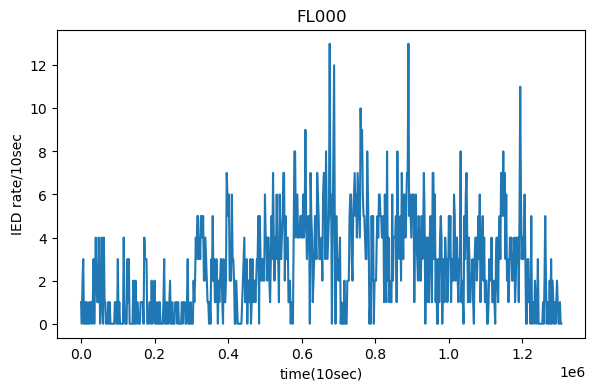

In [81]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(IED_rate[:,0],IED_rate[:,1]);
plt.xlabel('time(10sec)');
plt.ylabel('IED rate/10sec');
plt.title(str(sessions_flickerneuro.loc[0,'Subject_ID']));

In [82]:
# calculating the rate per 5 min: every 200*60*5 = 60000 samples
time_5min = np.arange(1,time_end,60000)
m_5t= time_5min.shape[0]
print(m_5t)
time_5min

22


array([      1,   60001,  120001,  180001,  240001,  300001,  360001,
        420001,  480001,  540001,  600001,  660001,  720001,  780001,
        840001,  900001,  960001, 1020001, 1080001, 1140001, 1200001,
       1260001])

In [83]:
IED_rate_5min = np.zeros((m_5t))

for idx, t in enumerate(time_5min[0:-2]):
    # print(idx,t)
    time_bin = true_IEDs_df_clean[(true_IEDs_df_clean['start']>time_5min[idx]) & (true_IEDs_df_clean['start']<= time_5min[idx+1])]
    count, w = np.shape(time_bin)
    #print(count)
    IED_rate_5min[idx] =  count

In [84]:
IED_rate_5min

array([ 37.,  19.,  30.,  17.,  17.,  77.,  75.,  41.,  99., 117., 127.,
       117., 144., 102., 139., 114.,  83.,  87.,  74., 120.,   0.,   0.])

In [85]:
mean_5min = np.mean(IED_rate_5min)
mean_5min

74.36363636363636

In [86]:
mean = np.mean(IED_rate[:,1])
mean

2.6055045871559632

In [87]:
#true_IEDs_df_clean.loc[:,'IED_rate'] = IED_rate
#true_IEDs_df_clean.head(100)
time[0]
count = IED_rate[0,1]
count
t=1
[count for i in range(t-1, t-1+int(count))]
#true_IEDs_df_clean.loc[(true_IEDs_df_clean['start']>t) & (true_IEDs_df_clean['start']<= time[t+1]),'IED_rate']

[1.0]

In [88]:
#for idx, t in enumerate(time):
#    print(idx, t)
#    count = int(IED_rate[idx,1])
#    print(count)
    #true_IEDs_df_clean.loc[(true_IEDs_df_clean['start']>t) & (true_IEDs_df_clean['start']<= time[t+1]),'IED_rate']=[count for i in range (t, t+count)]

In [89]:
true_IEDs_df[true_IEDs_df['chan']==42]

,start,chan
122,307662,42
123,309785,42
125,311324,42
126,312067,42
127,312240,42
...,...,...
1653,1199795,42
1655,1200704,42
1660,1203426,42
1675,1215307,42


In [90]:
count = np.count_nonzero(true_IEDs_df[true_IEDs_df['chan']==42])
count

790

In [91]:
IED_rate[:,0]=np.round(IED_rate[:,0]/200) # 200 Hz*1 sec = 200 
IED_rate[:,0]

array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
        180.,  190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,
        270.,  280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,
        360.,  370.,  380.,  390.,  400.,  410.,  420.,  430.,  440.,
        450.,  460.,  470.,  480.,  490.,  500.,  510.,  520.,  530.,
        540.,  550.,  560.,  570.,  580.,  590.,  600.,  610.,  620.,
        630.,  640.,  650.,  660.,  670.,  680.,  690.,  700.,  710.,
        720.,  730.,  740.,  750.,  760.,  770.,  780.,  790.,  800.,
        810.,  820.,  830.,  840.,  850.,  860.,  870.,  880.,  890.,
        900.,  910.,  920.,  930.,  940.,  950.,  960.,  970.,  980.,
        990., 1000., 1010., 1020., 1030., 1040., 1050., 1060., 1070.,
       1080., 1090., 1100., 1110., 1120., 1130., 1140., 1150., 1160.,
       1170., 1180., 1190., 1200., 1210., 1220., 1230., 1240., 1250.,
       1260., 1270.,

### 2.4: Normalize the IED rate

In [92]:
IED_rate[:,2] = stats.zscore(IED_rate[:,1])
IED_rate[0:10,2]

array([-0.70164847, -1.13867523, -0.26462171,  0.17240505, -1.13867523,
       -1.13867523, -0.70164847, -1.13867523, -0.70164847, -1.13867523])

In [94]:
IED_rate_df = pd.DataFrame(IED_rate[:,0:3],columns=['time','IED_rate','Normalized_IED_rate'])
IED_rate_df.head(10)

,time,IED_rate,Normalized_IED_rate
0,0.0,1.0,-0.701648
1,10.0,0.0,-1.138675
2,20.0,2.0,-0.264622
3,30.0,3.0,0.172405
4,40.0,0.0,-1.138675
5,50.0,0.0,-1.138675
6,60.0,1.0,-0.701648
7,70.0,0.0,-1.138675
8,80.0,1.0,-0.701648
9,90.0,0.0,-1.138675


### 2.5: adding frequency of stimulation during session 

In [95]:
# import the frequency of stimulation during the trials of a session

dir_path=[""]*(rows-1)
for p in range(rows-1):
    idx = sessions_flickerneuro.index[p]
    subject_path = str(sessions_flickerneuro.loc[idx,'Subject_ID'])+ "/task-flickerneuro/ses-0" + str(sessions_flickerneuro.loc[idx,'Session'])
    dir_path[p]= "Y:/stg-preproc/sub-"+ subject_path

In [96]:
dir_path

['Y:/stg-preproc/sub-FL000/task-flickerneuro/ses-01',
 'Y:/stg-preproc/sub-FL001/task-flickerneuro/ses-01',
 'Y:/stg-preproc/sub-FL002/task-flickerneuro/ses-01',
 'Y:/stg-preproc/sub-FL003/task-flickerneuro/ses-01',
 'Y:/stg-preproc/sub-FL005/task-flickerneuro/ses-01',
 'Y:/stg-preproc/sub-FL007/task-flickerneuro/ses-01',
 'Y:/stg-preproc/sub-FL009/task-flickerneuro/ses-01',
 'Y:/stg-preproc/sub-FL010/task-flickerneuro/ses-01',
 'Y:/stg-preproc/sub-FL011/task-flickerneuro/ses-01',
 'Y:/stg-preproc/sub-FL012/task-flickerneuro/ses-01',
 'Y:/stg-preproc/sub-FL014/task-flickerneuro/ses-01',
 'Y:/stg-preproc/sub-FL014/task-flickerneuro/ses-02',
 'Y:/stg-preproc/sub-FL016/task-flickerneuro/ses-01']

In [97]:
mat_path=[""]*13
i=0
for p in range(rows-1):
    abs_dir_path = os.path.abspath(dir_path[p])
    for idx, f in enumerate(os.listdir(abs_dir_path)):    
        if f.endswith('.mat'):
            mat_path[i] = os.path.abspath(abs_dir_path+'\\'+f)
            i=i+1

In [98]:
mat_path

['Y:\\stg-preproc\\sub-FL000\\task-flickerneuro\\ses-01\\sub-FL000_stg-preproc_task-flickerNeuro_ses-01_nat-beh.mat',
 'Y:\\stg-preproc\\sub-FL001\\task-flickerneuro\\ses-01\\sub-FL001_stg-preproc_task-flickerNeuro_ses-01_nat-beh.mat',
 'Y:\\stg-preproc\\sub-FL002\\task-flickerneuro\\ses-01\\sub-FL002_stg-preproc_task-flickerNeuro_ses-01_nat-beh.mat',
 'Y:\\stg-preproc\\sub-FL003\\task-flickerneuro\\ses-01\\sub-FL003_stg-preproc_task-flickerNeuro_ses-01_nat-beh.mat',
 'Y:\\stg-preproc\\sub-FL005\\task-flickerneuro\\ses-01\\sub-FL005_stg-preproc_task-flickerNeuro_ses-01_nat-beh.mat',
 'Y:\\stg-preproc\\sub-FL007\\task-flickerneuro\\ses-01\\sub-FL007_stg-preproc_task-flickerNeuro_ses-01_nat-beh.mat',
 'Y:\\stg-preproc\\sub-FL009\\task-flickerneuro\\ses-01\\sub-FL009_stg-preproc_task-flickerNeuro_ses-01_nat-beh.mat',
 'Y:\\stg-preproc\\sub-FL010\\task-flickerneuro\\ses-01\\sub-FL010_stg-preproc_task-flickerNeuro_ses-01_nat-beh.mat',
 'Y:\\stg-preproc\\sub-FL011\\task-flickerneuro\\ses-01\

In [99]:
mat_contents = loadmat(mat_path[0],simplify_cells=True, mat_dtype=True)

In [202]:
trials = mat_contents['trials']
trials['clinrecording']

{'sampleRate': 2048.0,
 'VisualOut': array([False, False, False, ..., False, False, False]),
 'trials_timestamps': array([[ 4481018.,  4501497.],
        [ 4501497.,  4521976.],
        [ 4524026.,  4544505.],
        [ 4544505.,  4564984.],
        [ 4566778.,  4587257.],
        [ 4587257.,  4607736.],
        [ 4607738.,  4628217.],
        [ 4628217.,  4648696.],
        [ 4651889.,  4672368.],
        [ 4672368.,  4692847.],
        [ 4694897.,  4715376.],
        [ 4715376.,  4735855.],
        [ 4737905.,  4758384.],
        [ 4758384.,  4778863.],
        [ 4780373.,  4800852.],
        [ 4800852.,  4821331.],
        [ 4823381.,  4843860.],
        [ 4843860.,  4864339.],
        [ 4866149.,  4886628.],
        [ 4886628.,  4907107.],
        [ 4909157.,  4929636.],
        [ 4929636.,  4950115.],
        [ 4951081.,  4971560.],
        [ 4971560.,  4992039.],
        [ 4994089.,  5014568.],
        [ 5014568.,  5035047.],
        [ 5037097.,  5057576.],
        [ 5057576.,  5

In [200]:
fourty_Hz = trials['outputSignal']['Hz40']
print(fourty_Hz[1:10,:])
print(fourty_Hz.shape)


[[ 5.00000000e+00  1.29462766e-07]
 [ 5.00000000e+00  4.93745619e-07]
 [ 5.00000000e+00  1.02239458e-06]
 [ 5.00000000e+00  1.60408681e-06]
 [ 5.00000000e+00  2.09541088e-06]
 [ 5.00000000e+00  2.33243712e-06]
 [ 5.00000000e+00  2.14439943e-06]
 [ 5.00000000e+00  1.36867568e-06]
 [ 5.00000000e+00 -1.33839478e-07]]
(2500000, 2)


In [101]:
trials_timestamps = mat_contents['trials']['clinrecording']['trials_timestamps']
#trials_timestamps
np.shape(trials_timestamps)
#trials_timestamps

(366, 2)

In [102]:
trial_identities = mat_contents['trials']['trials_identities'][:,0]
trial_identities
np.shape(trial_identities)
#trial_identities = np.reshape(trial_identities,(366,1))
np.shape(trial_identities)
print(trial_identities[0:10])

[ 8.  2.  4.  2.  7.  2. 14.  2. 14.  2.]


In [105]:
sample_rate = mat_contents['trials']['clinrecording']['sampleRate']
sample_rate

2048.0

In [120]:
col_names = ['start_time','condition_code']
start_times = np.round(trials_timestamps[:,0]/sample_rate, decimals=0)-2188 #shifting the start time to 0
#start_times = np.reshape(start_times,(366,1))
np.shape(start_times)

(366,)

In [121]:
condition_df = pd.DataFrame({'start_time (sec)':start_times,'condition_code': trial_identities.astype(np.uint8)})
condition_df.head(10)

,start_time (sec),condition_code
0,0.0,8
1,10.0,2
2,21.0,4
3,31.0,2
4,42.0,7
5,52.0,2
6,62.0,14
7,72.0,2
8,83.0,14
9,93.0,2


In [122]:
condtion_code_path = os.path.abspath("Y:\Sina\stg-analysis\IED_distributions\sub-FL000_ses-01_condition-codes.xlsx")
condtion_code_path

'Y:\\Sina\\stg-analysis\\IED_distributions\\sub-FL000_ses-01_condition-codes.xlsx'

In [123]:
row_names = np.arange(1,16)
row_names

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [124]:
condition_code = pd.read_excel(condtion_code_path,header=None)
#condition_code

In [125]:
condition_code.index = row_names
condition_code

,0
1,stop
2,Baseline
3,R-V
4,R-AV
5,R-A
6,5.5Hz-V
7,5.5Hz-AV
8,5.5Hz-A
9,40Hz-V
10,40Hz-AV


In [126]:
len(condition_code)

15

In [127]:
condition_code.loc[2,0]

'Baseline'

In [128]:
indexes = condition_df.loc[condition_df['condition_code']==2].index
indexes

Int64Index([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,
            ...
            341, 343, 345, 347, 349, 351, 353, 355, 357, 359],
           dtype='int64', length=180)

In [129]:
condition_code.loc[2]

0    Baseline
Name: 2, dtype: object

In [130]:
condition_df.loc[indexes, 'conditions']=condition_code.loc[2,0]
condition_df.head(10)

,start_time (sec),condition_code,conditions
0,0.0,8,NaN
1,10.0,2,Baseline
2,21.0,4,NaN
3,31.0,2,Baseline
4,42.0,7,NaN
5,52.0,2,Baseline
6,62.0,14,NaN
7,72.0,2,Baseline
8,83.0,14,NaN
9,93.0,2,Baseline


In [131]:
for c in range(1,len(condition_code)):
    print(c)
    indexes = condition_df.loc[condition_df['condition_code']==c].index
    condition_df.loc[indexes, 'conditions']=condition_code.loc[c,0]

1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [145]:
condition_df.head(10)

,start_time (sec),condition_code,conditions,Norm_IED_rate
0,0.0,8,5.5Hz-A,-0.701648
1,10.0,2,Baseline,-1.138675
2,21.0,4,R-AV,-0.264622
3,31.0,2,Baseline,0.172405
4,42.0,7,5.5Hz-AV,-1.138675
5,52.0,2,Baseline,-1.138675
6,62.0,14,80Hz-A,-0.701648
7,72.0,2,Baseline,-1.138675
8,83.0,14,80Hz-A,-0.701648
9,93.0,2,Baseline,-1.138675


In [146]:
IED_rate_df.head(10)

,time,IED_rate,Normalized_IED_rate
0,0.0,1.0,-0.701648
1,10.0,0.0,-1.138675
2,20.0,2.0,-0.264622
3,30.0,3.0,0.172405
4,40.0,0.0,-1.138675
5,50.0,0.0,-1.138675
6,60.0,1.0,-0.701648
7,70.0,0.0,-1.138675
8,80.0,1.0,-0.701648
9,90.0,0.0,-1.138675


In [141]:
range(1,len(condition_df))

range(1, 366)

In [143]:
condition_df.loc[0,"Norm_IED_rate"]

-0.7016484715613732

In [144]:
for c in range(1,len(condition_df)):
    if IED_rate_df.iloc[c,0]<= condition_df.iloc[c,0]:
        condition_df.loc[c,"Norm_IED_rate"]=IED_rate_df.iloc[c,2]
condition_df

,start_time (sec),condition_code,conditions,Norm_IED_rate
0,0.0,8,5.5Hz-A,-0.701648
1,10.0,2,Baseline,-1.138675
2,21.0,4,R-AV,-0.264622
3,31.0,2,Baseline,0.172405
4,42.0,7,5.5Hz-AV,-1.138675
...,...,...,...,...
361,4192.0,15,NaN,-1.138675
362,4202.0,15,NaN,-0.264622
363,4212.0,15,NaN,-0.264622
364,4222.0,15,NaN,-0.264622


In [147]:
condition_df.head(10)

,start_time (sec),condition_code,conditions,Norm_IED_rate
0,0.0,8,5.5Hz-A,-0.701648
1,10.0,2,Baseline,-1.138675
2,21.0,4,R-AV,-0.264622
3,31.0,2,Baseline,0.172405
4,42.0,7,5.5Hz-AV,-1.138675
5,52.0,2,Baseline,-1.138675
6,62.0,14,80Hz-A,-0.701648
7,72.0,2,Baseline,-1.138675
8,83.0,14,80Hz-A,-0.701648
9,93.0,2,Baseline,-1.138675


In [154]:
condition_df["conditions"].astype(str)
condition_df.head()

,start_time (sec),condition_code,conditions,Norm_IED_rate
0,0.0,8,5.5Hz-A,-0.701648
1,10.0,2,Baseline,-1.138675
2,21.0,4,R-AV,-0.264622
3,31.0,2,Baseline,0.172405
4,42.0,7,5.5Hz-AV,-1.138675


In [156]:
condition_df["Norm_IED_rate"].astype(np.float16)
condition_df.head(10)

,start_time (sec),condition_code,conditions,Norm_IED_rate
0,0.0,8,5.5Hz-A,-0.701648
1,10.0,2,Baseline,-1.138675
2,21.0,4,R-AV,-0.264622
3,31.0,2,Baseline,0.172405
4,42.0,7,5.5Hz-AV,-1.138675
5,52.0,2,Baseline,-1.138675
6,62.0,14,80Hz-A,-0.701648
7,72.0,2,Baseline,-1.138675
8,83.0,14,80Hz-A,-0.701648
9,93.0,2,Baseline,-1.138675


In [177]:
range(0,len(condition_df.iloc[:,0]))

range(0, 366)

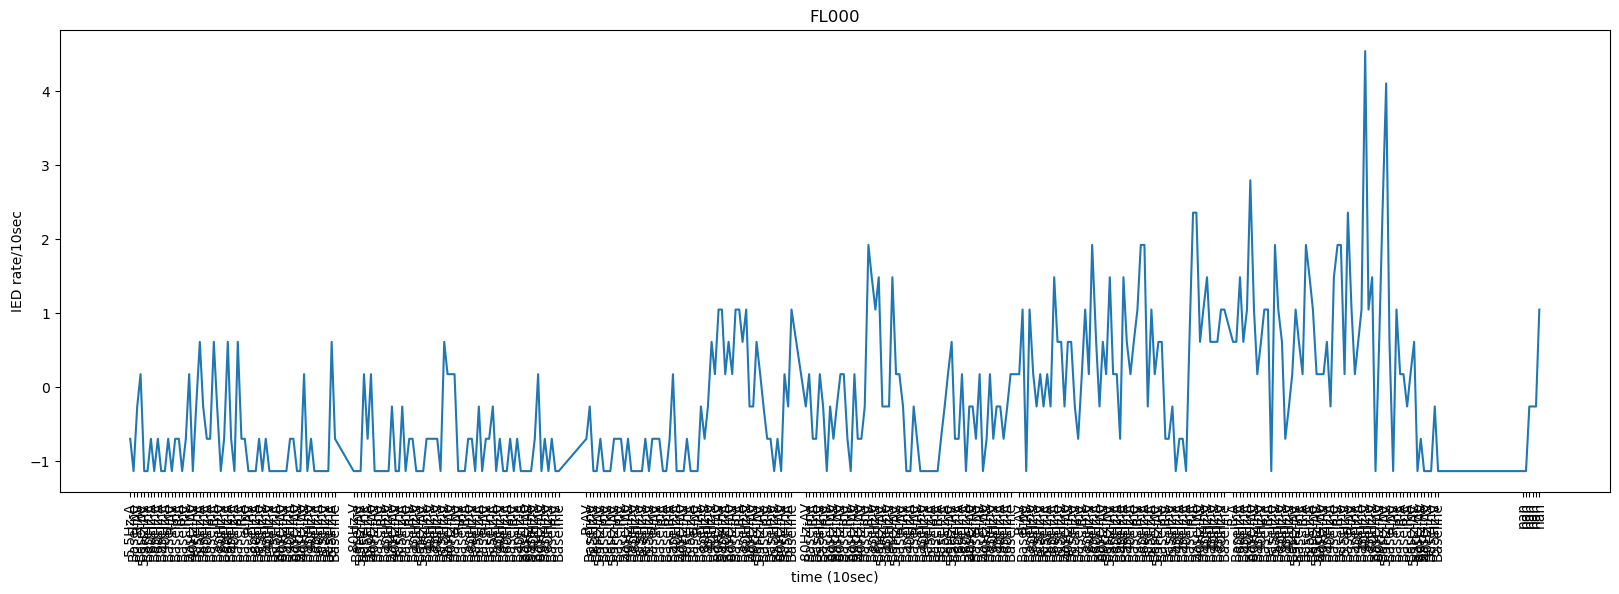

In [191]:
# add it to the dataframe and plot freq vs. Normalized IED rate
plt.figure(figsize=(20,6))
plt.plot(condition_df.iloc[:,0],condition_df.iloc[:,3]);
plt.xticks(ticks=condition_df.iloc[:,0],labels=condition_df.iloc[:,2],rotation=90)
plt.xlabel('time (10sec)');
plt.ylabel('IED rate/10sec');
plt.title(str(sessions_flickerneuro.loc[0,'Subject_ID']));
plt.rc('font', size=10)
plt.show()

In [245]:
('5.5Hz-A' or '5.5Hz-V' or '5.5Hz-AV') in [condition_df.iloc[0,2]]

True

In [246]:
for c in range(0,len(condition_df.iloc[:,0])):
    #print(c)
    if 'Baseline' in [condition_df.iloc[c,2]]:
        condition_df.loc[c,"frequency"]=0
    elif ('5.5Hz-A' or '5.5Hz-V' or '5.5Hz-AV') in [condition_df.iloc[c,2]]:
        condition_df.loc[c,"frequency"]=5.5
    elif ('40Hz-A' or '40Hz-V' or '40Hz-AV') in [condition_df.iloc[c,2]]:
        condition_df.loc[c,"frequency"]=40
    elif ('80Hz-A' or '80Hz-V' or '80Hz-AV') in [condition_df.iloc[c,2]]:
        condition_df.loc[c,"frequency"]=80
    elif 'nan' in [condition_df.iloc[c,2]]:
        condition_df.loc[c,"frequency"]=''
condition_df.head(10)

,start_time (sec),condition_code,conditions,Norm_IED_rate,frequency
0,0.0,8,5.5Hz-A,-0.701648,5.5
1,10.0,2,Baseline,-1.138675,0
2,21.0,4,R-AV,-0.264622,nan
3,31.0,2,Baseline,0.172405,0
4,42.0,7,5.5Hz-AV,-1.138675,5.5
5,52.0,2,Baseline,-1.138675,0
6,62.0,14,80Hz-A,-0.701648,80
7,72.0,2,Baseline,-1.138675,0
8,83.0,14,80Hz-A,-0.701648,80
9,93.0,2,Baseline,-1.138675,0


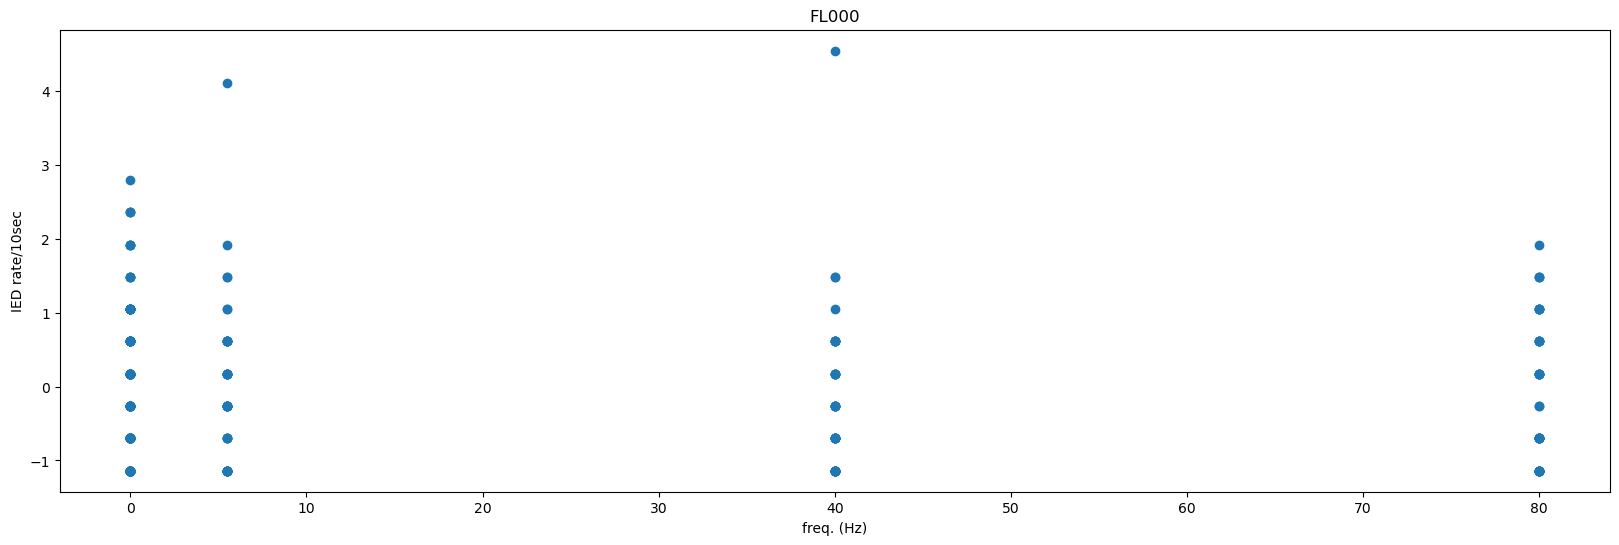

In [248]:
# add it to the dataframe and plot freq vs. Normalized IED rate
plt.figure(figsize=(20,6))
plt.scatter(condition_df.iloc[:,4],condition_df.iloc[:,3]);
#plt.xticks(ticks=condition_df.iloc[:,0],labels=condition_df.iloc[:,2],rotation=90)
plt.xlabel('freq. (Hz)');
plt.ylabel('IED rate/10sec');
plt.title(str(sessions_flickerneuro.loc[0,'Subject_ID']));
plt.rc('font', size=10)
plt.show()

In [ ]:
plt.figure()
sns.violinplot()

##  3. Plot histograms with different time size bins for each session


In [39]:
fig_name = 'sub-'+ str(sessions_flickerneuro.loc[0,'Subject_ID'])+'_IED_rate_plot.png'
result_path_fig = "C:/Users/sinad/OneDrive - Georgia Institute of Technology/DrGross/Lou/IED_rate/Results/"+fig_name
result_path_fig_win = os.path.abspath(result_path_fig)
result_path_fig_win

'C:\\Users\\sinad\\OneDrive - Georgia Institute of Technology\\DrGross\\Lou\\IED_rate\\Results\\sub-FL000_IED_rate_plot.png'

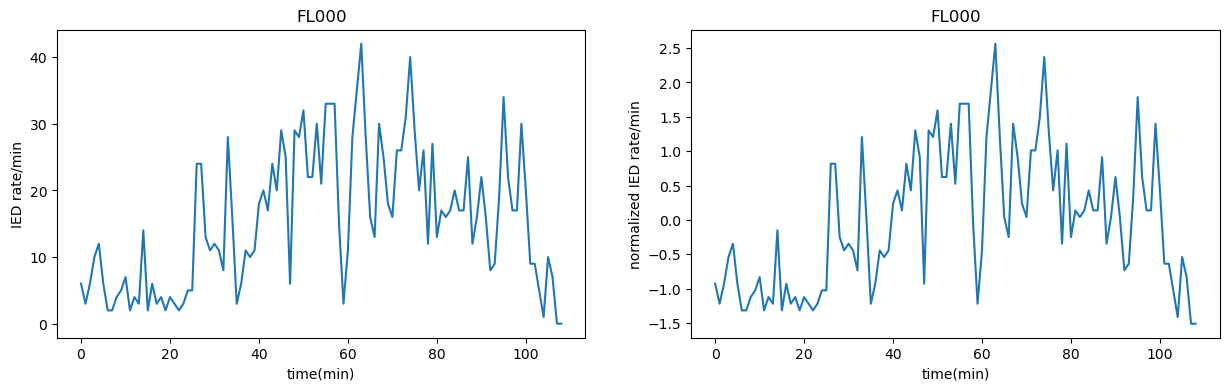

In [94]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(IED_rate[:,0],IED_rate[:,1]);
plt.xlabel('time(min)');
plt.ylabel('IED rate/min');
plt.title(str(sessions_flickerneuro.loc[0,'Subject_ID']));

plt.subplot(1,2,2)
plt.plot(IED_rate[:,0],IED_rate[:,2]);
plt.xlabel('time(min)');
plt.ylabel('normalized IED rate/min');
plt.title(str(sessions_flickerneuro.loc[0,'Subject_ID']));
#plt.savefig(result_path_fig_win)

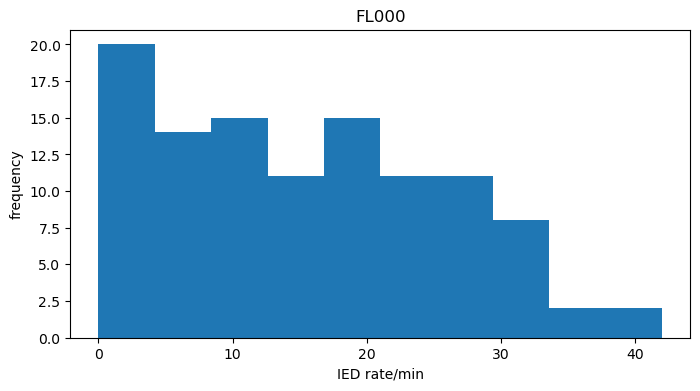

In [41]:
plt.figure(figsize=(8,4))
plt.hist(IED_rate[:,1],bins=10);
plt.ylabel('frequency');
plt.xlabel('IED rate/min');
plt.title(str(sessions_flickerneuro.loc[0,'Subject_ID']));

<Axes: xlabel='start', ylabel='chan'>

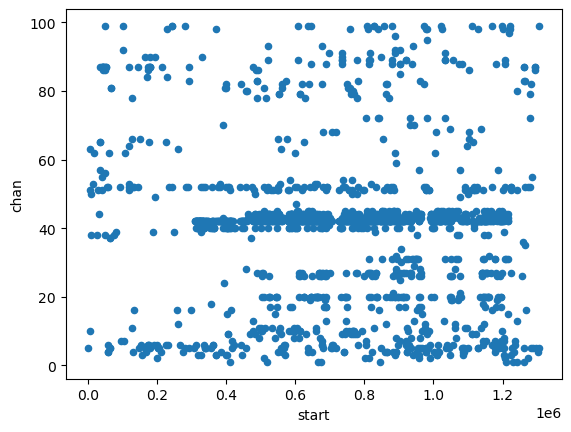

In [42]:
true_IEDs_df_clean.plot.scatter(x='start',y='chan')

In [43]:
true_IEDs_df_clean[true_IEDs_df_clean['chan']==42]

,start,chan
122,307662,42
123,309785,42
125,311324,42
126,312067,42
127,312240,42
...,...,...
1653,1199795,42
1655,1200704,42
1660,1203426,42
1675,1215307,42


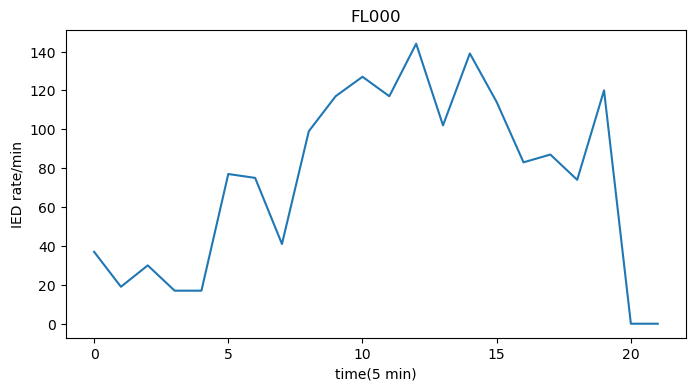

In [44]:
plt.figure(figsize=(8,4))
plt.plot(time_5min/60000,IED_rate_5min);
plt.xlabel('time(5 min)');
plt.ylabel('IED rate/min');
plt.title(str(sessions_flickerneuro.loc[0,'Subject_ID']));

### 3.1: save the results as a csv and figure

In [45]:
file_name = 'sub-'+ str(sessions_flickerneuro.loc[0,'Subject_ID'])+'_IED_rate.csv'
result_path = "C:/Users/sinad/OneDrive - Georgia Institute of Technology/DrGross/Lou/IED_rate/Results/"+file_name
result_path_win = os.path.abspath(result_path)
result_path_win

'C:\\Users\\sinad\\OneDrive - Georgia Institute of Technology\\DrGross\\Lou\\IED_rate\\Results\\sub-FL000_IED_rate.csv'

In [46]:
IED_rate_df.to_csv(result_path_win)

## 4. convert each step into a function and run in a loop for all of the selected subject's sessions


In [47]:
sessions = np.arange(0,rows)[0:-1]
sessions

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [48]:
IED_path[0]

'Y:/stg-preproc/sub-FL000/task-flickerneuro/ses-01/IED-preproc/'

In [49]:
sess_idx = sessions_flickerneuro.index.values[0]
sess_idx

0

0 Y:/stg-preproc/sub-FL000/task-flickerneuro/ses-01/IED-preproc/
The session index is:  0
session path found:  Y:\stg-preproc\sub-FL000\task-flickerneuro\ses-01\IED-preproc\sub-FL000_allspikes.csv
session df shape:  (8273, 6)
session df shape after exclucing false positives is:  (3019, 6)
the shape of true_IEDs_df is:  (3019, 2)
the shape of true_IEDs_df after filtering overlapping ones is:  (1726, 2)
the start and end times are:  (233, 1306738)
the shape of IED rate per min is:  (109, 3)
------------------------------------------------------------
1 Y:/stg-preproc/sub-FL001/task-flickerneuro/ses-01/IED-preproc/
The session index is:  1
session path found:  Y:\stg-preproc\sub-FL001\task-flickerneuro\ses-01\IED-preproc\sub-FL001_allspikes.csv
session df shape:  (30788, 6)
session df shape after exclucing false positives is:  (27265, 6)
the shape of true_IEDs_df is:  (27265, 2)
the shape of true_IEDs_df after filtering overlapping ones is:  (10053, 2)
the start and end times are:  (226, 

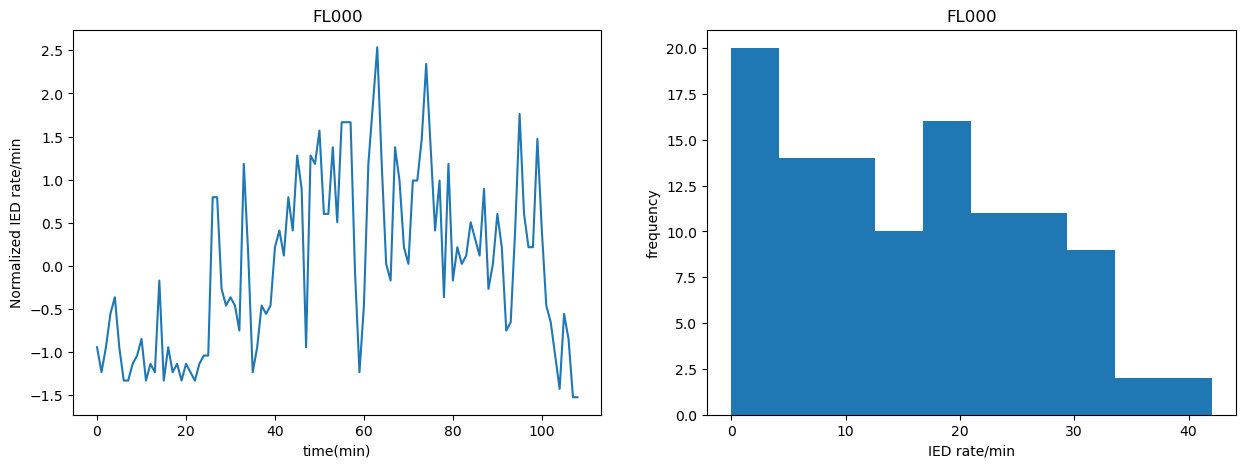

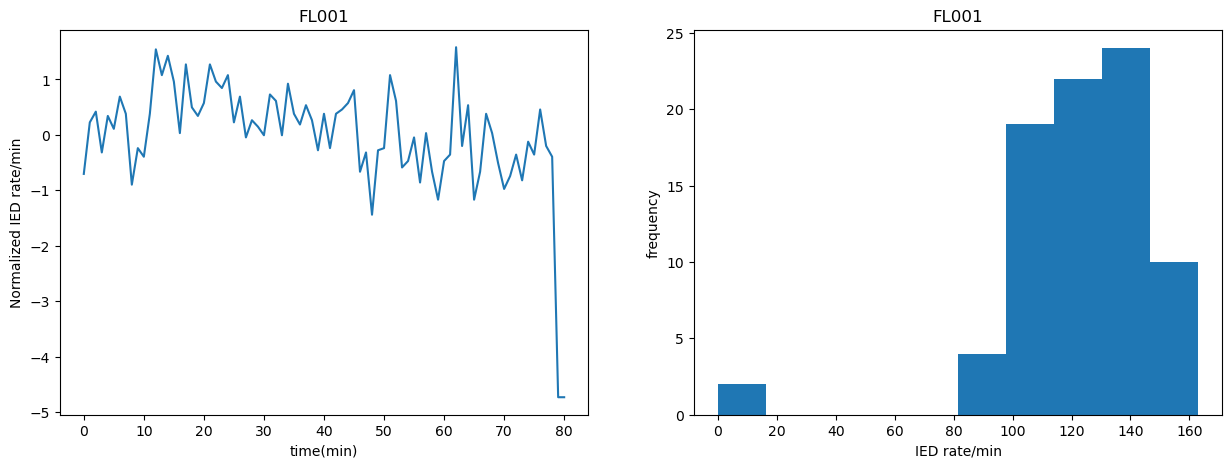

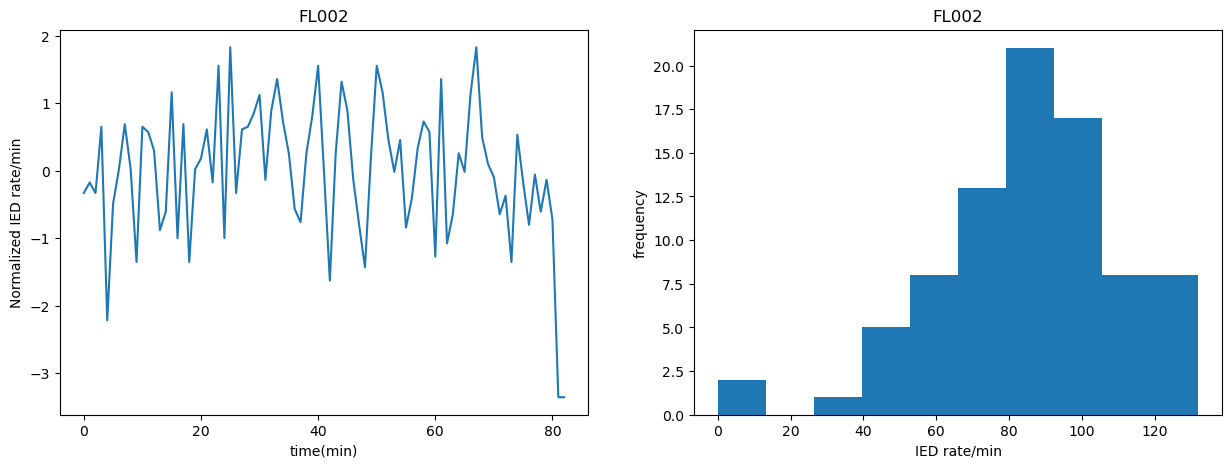

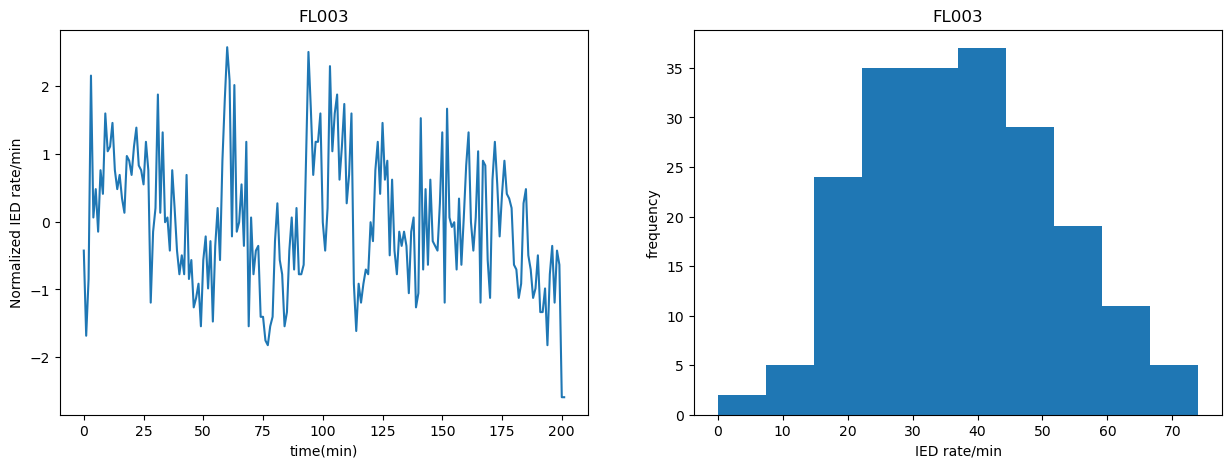

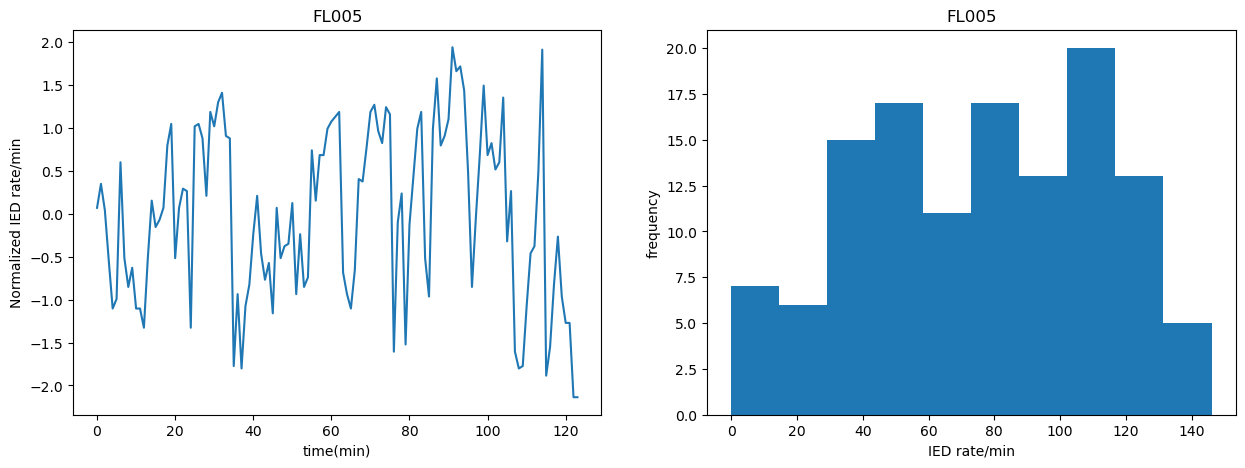

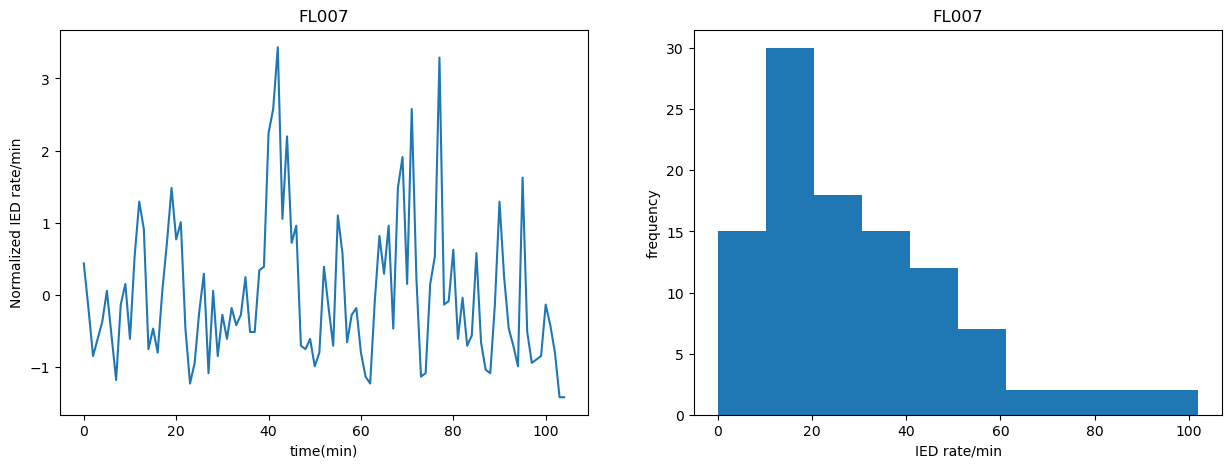

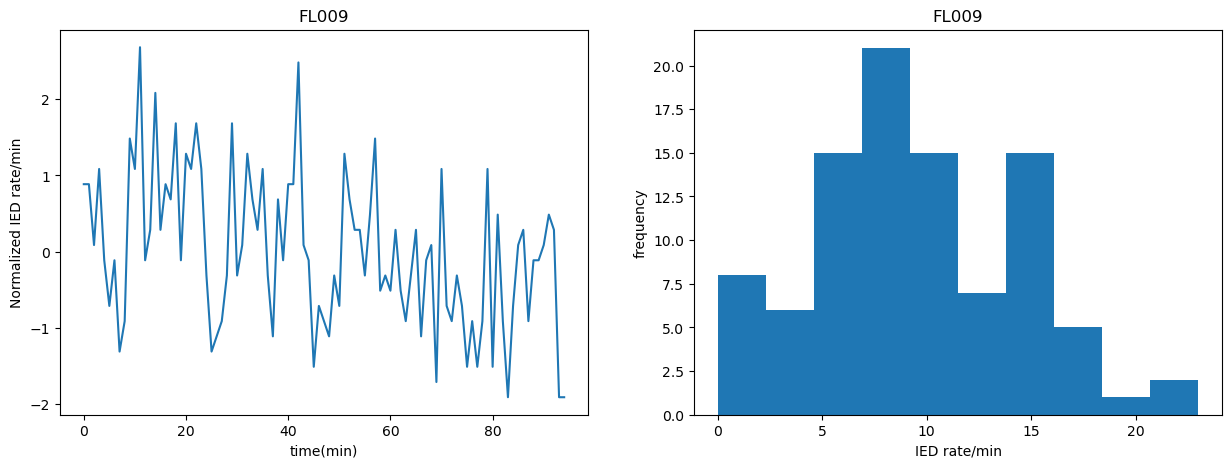

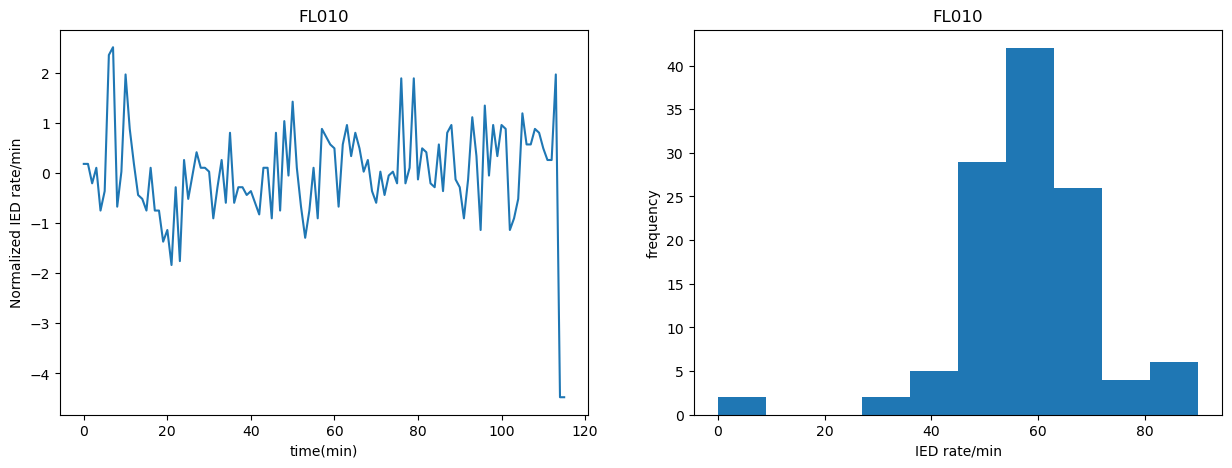

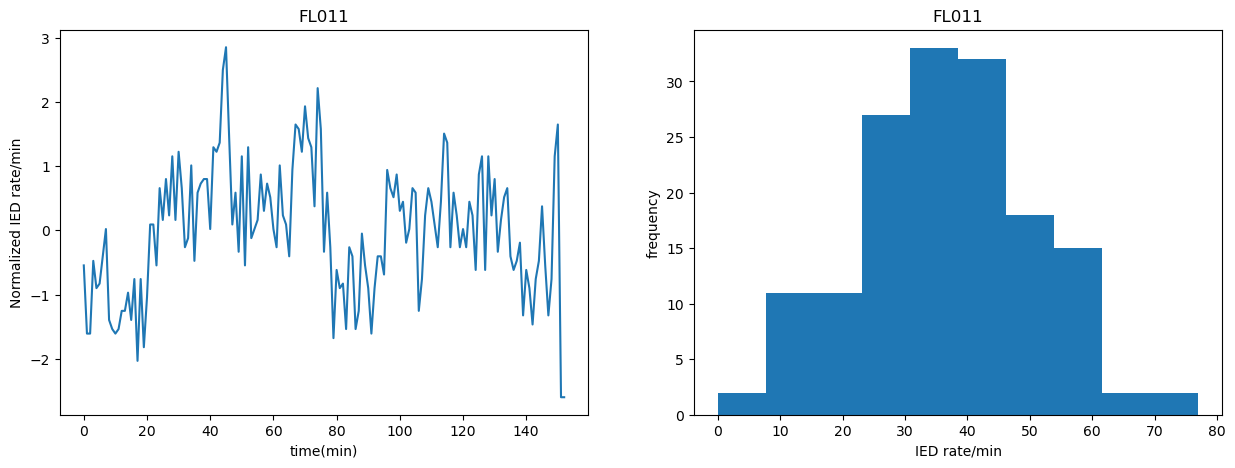

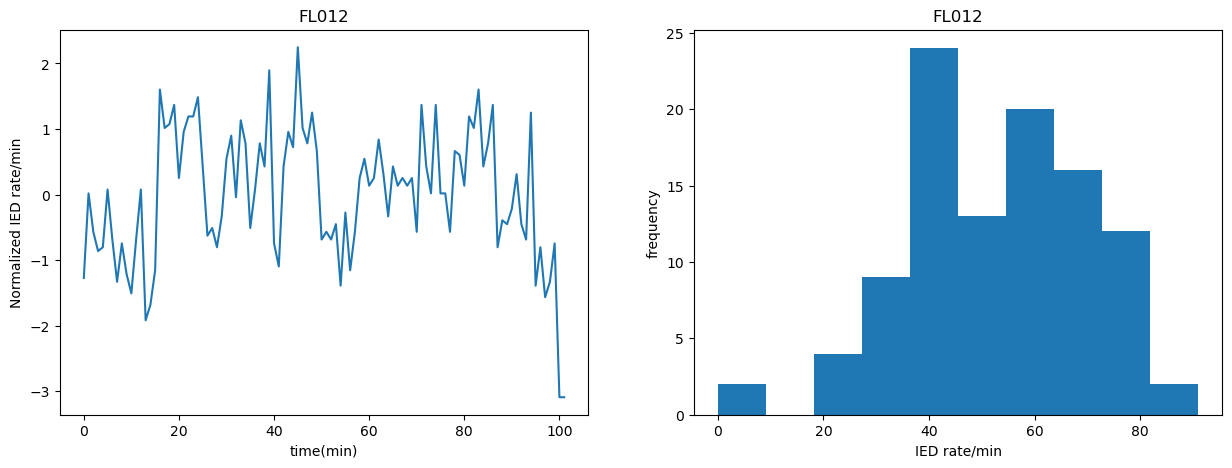

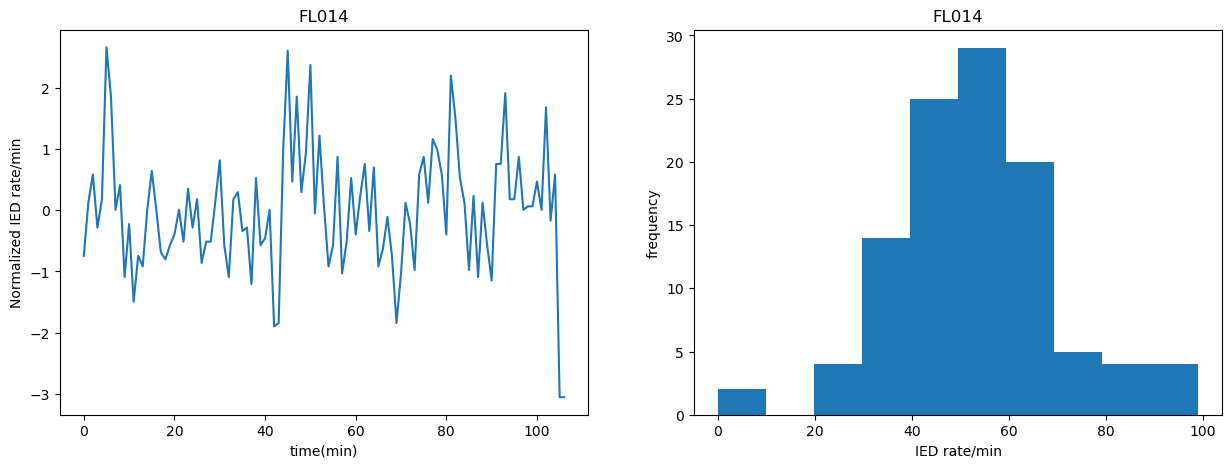

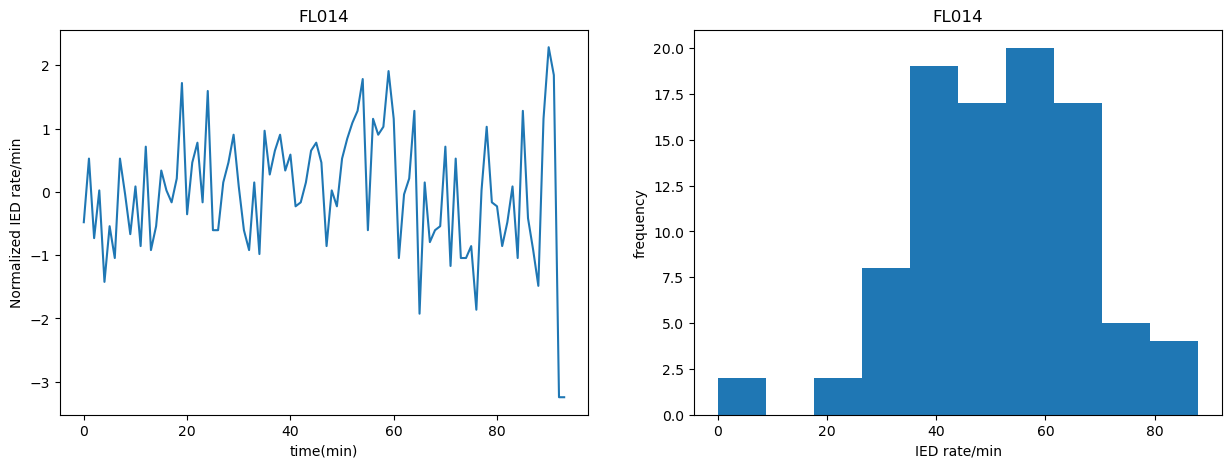

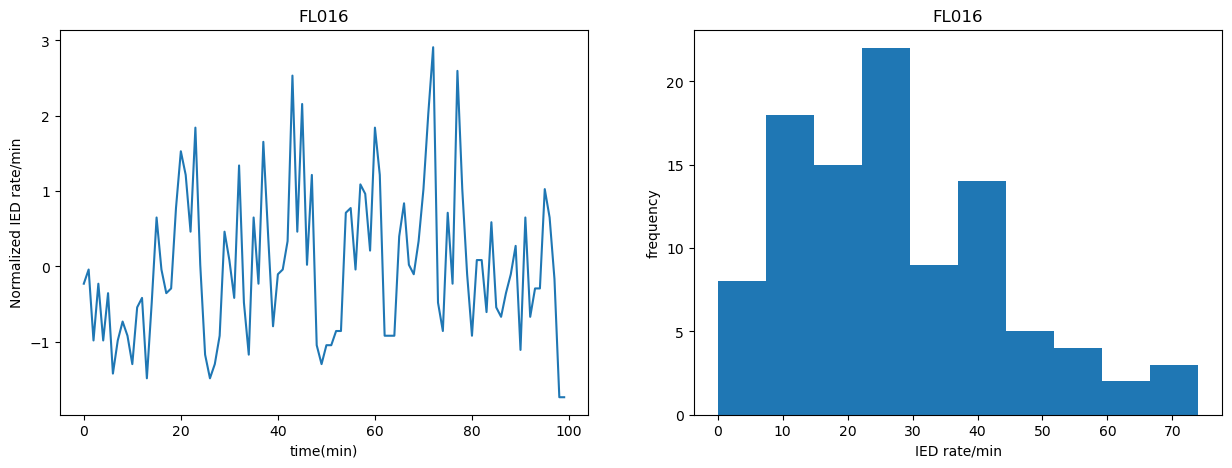

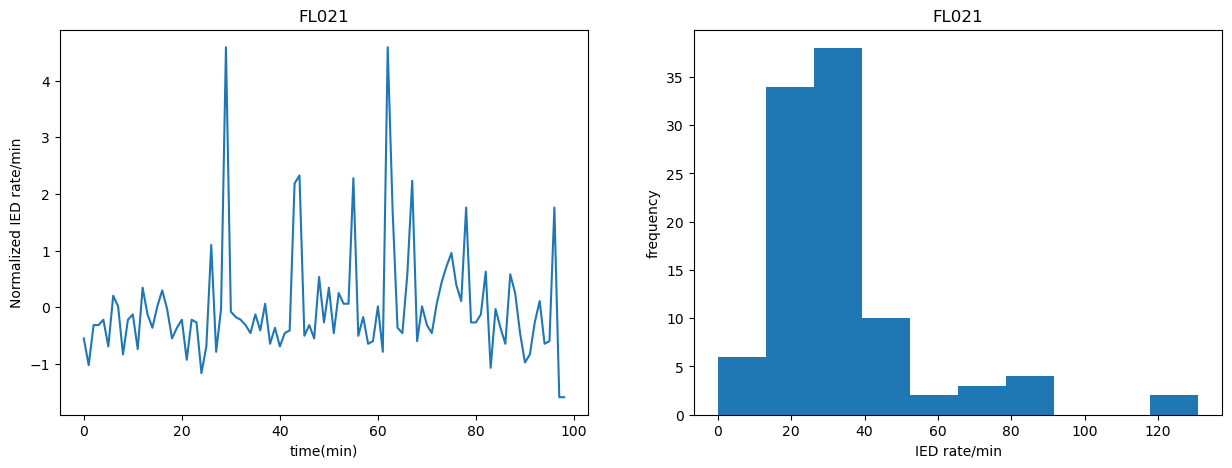

In [98]:
for idx_p, p in enumerate(IED_path):
    print(idx_p,p)
    sess_idx = sessions_flickerneuro.index.values[idx_p]
    print("The session index is: ", sess_idx)
    session_path=IED_path[idx_p]+'sub-'+ str(sessions_flickerneuro.loc[sess_idx,'Subject_ID'])+'_allspikes.csv'
    session_path_win = os.path.abspath(session_path)
    if os.path.exists(session_path_win):
        print("session path found: ", session_path_win)
        session_df = pd.read_csv(session_path_win)
        print("session df shape: ", session_df.shape)
        session_df_tp = session_df[session_df['predicted_class']==0] # filter in true positive
        # filter out over lapping IEDs within 100 msec, or 20 samples.
        m, n = session_df_tp.shape
        print("session df shape after exclucing false positives is: ", (m,n))
        true_IEDs = np.zeros((m,2),dtype=np.int64)
        i = 0
        for idx, ied in enumerate(session_df_tp.index.values[:-1]): #range(1,m-1):
            #print(idx, ied)
            if (session_df_tp.index.values[[idx+1]][0]):
                idx_plus_one = session_df_tp.index.values[[idx+1]][0]
                #print(idx_plus_one)
                if (int(session_df_tp.loc[[ied], 'start']+20) < int(session_df_tp.loc[[idx_plus_one], 'start'])):
                    true_IEDs[i,:] = [session_df_tp.loc[ied,'start'],session_df_tp.loc[ied,'chan']]
                    i=  i+1
                else:
                    ied = ied+1
                    
        true_IEDs_df = pd.DataFrame(true_IEDs,columns=['start','chan'])
        print("the shape of true_IEDs_df is: ", true_IEDs_df.shape)
        #filter out the zero values
        true_IEDs_df_clean= true_IEDs_df[(true_IEDs_df['start']!=0)] #(true_IEDs_df['chan']!=0) &
        print("the shape of true_IEDs_df after filtering overlapping ones is: ", true_IEDs_df_clean.shape)
        #print(true_IEDs_df_clean)
        # fs=200 Hz, so to convert samples to rate IED/min: 200*60 sec = 12000, need to calculate the global number of IEDs from all channels every 12000 samples
        time_start = true_IEDs_df_clean.iat[0,0]
        time_end = true_IEDs_df_clean.iat[-1,0]
        print("the start and end times are: ",(time_start,time_end))
        time = np.arange(1,time_end,12000)
        m_t = time.shape
        IED_rate = np.zeros((int(m_t[0]),3))
        IED_rate[:,0]=time
        for idx, t in enumerate(time[0:-2]):
            #print(idx,t)
            time_bin = true_IEDs_df_clean[(true_IEDs_df_clean['start']>time[idx]) & (true_IEDs_df_clean['start']<= time[idx+1])]
            count, w = np.shape(time_bin)
            #print(count)
            IED_rate[idx,1] =  count
        
        IED_rate[:,0]=IED_rate[:,0]/12000
        IED_rate[:,2] = stats.zscore(IED_rate[:,1])
        IED_rate_df = pd.DataFrame(IED_rate[:,0:3],columns=['time','IED_rate','Normalized_IED_rate'])
        print("the shape of IED rate per min is: ", IED_rate_df.shape)
        file_name = 'sub-'+ str(sessions_flickerneuro.loc[sess_idx,'Subject_ID'])+'_IED_rate.csv'
        result_path = "C:/Users/sinad/OneDrive - Georgia Institute of Technology/DrGross/Lou/IED_rate/Results/"+file_name
        result_path_win = os.path.abspath(result_path)
        IED_rate_df.to_csv(result_path_win)
        del IED_rate_df, session_df_tp, session_df
        
        fig_name = 'sub-'+ str(sessions_flickerneuro.loc[sess_idx,'Subject_ID'])+'_IED_rate_plot.png'
        result_path_fig = "C:/Users/sinad/OneDrive - Georgia Institute of Technology/DrGross/Lou/IED_rate/Results/"+fig_name
        result_path_fig_win = os.path.abspath(result_path_fig)
        
        plt.figure(figsize=(15,5));
        plt.subplot(1,2,1)
        plt.plot(IED_rate[:,0],IED_rate[:,2]);
        plt.xlabel('time(min)');
        plt.ylabel('Normalized IED rate/min');
        plt.title(str(sessions_flickerneuro.loc[sess_idx,'Subject_ID']));
        
        plt.subplot(1,2,2)
        plt.hist(IED_rate[:,1],bins=10);
        plt.ylabel('frequency');
        plt.xlabel('IED rate/min');
        plt.title(str(sessions_flickerneuro.loc[sess_idx,'Subject_ID']));
        plt.savefig(result_path_fig_win)
        del IED_rate
        print("------------------------------------------------------------")